In [1]:
range(3)

[0, 1, 2]

In [2]:
import wasabiplot as wp

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from __future__ import print_function

import glob
bam_filenames = glob.glob('/home/obotvinnik/projects/singlecell_pnms/analysis/bams_from_aws/*.bam')

sample_id = 'M2_02'

bam_filename = [x for x in bam_filenames if sample_id in x][0]
bam_filename

'/home/obotvinnik/projects/singlecell_pnms/analysis/bams_from_aws/M2_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam'

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='paper', style='white')

%matplotlib inline

In [6]:
from outrigger.region import Region

snap25_mxe_event = 'exon:chr20:10265372-10265420:+@exon:chr20:10273530-10273647:+@exon:chr20:10273809-10273926:+@exon:chr20:10277573-10277698:+'

snap25_exons = snap25_mxe_event.split('@')
snap25_regions = map(Region, snap25_exons)
snap25_regions

[outrigger.Region (exon:chr20:10265372-10265420:+),
 outrigger.Region (exon:chr20:10273530-10273647:+),
 outrigger.Region (exon:chr20:10273809-10273926:+),
 outrigger.Region (exon:chr20:10277573-10277698:+)]

In [7]:
chrom = snap25_regions[0].chrom
start = snap25_regions[0].start
stop = snap25_regions[-1].stop
strand = snap25_regions[0].strand


/home/obotvinnik/workspace-git/wasabiplot/wasabiplot/visualize.py:79: UserWarning: Skipping read with CIGAR string D (a base in the read was deleted): HWI-ST1001:211:C1PUCACXX:8:2204:7788:53829 (from /home/obotvinnik/projects/singlecell_pnms/analysis/bams_from_aws/M2_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam)
  full=HTSeq.cigar_operation_names[cigar]))


[(0, 100)]

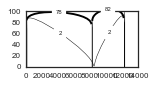

In [8]:
fig, ax = plt.subplots(figsize=(2, 1))
wp.wasabiplot(bam_filename, chrom, start, stop, strand, color='black', ax=ax)
ax.set(ylim=(0, 100))

In [9]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='white', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

import flotilla


flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'

study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian', flotilla_dir=flotilla_dir)

# not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2017-01-03 16:55:23	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian/datapackage.json


/home/obotvinnik/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/obotvinnik/workspace-git/flotilla/flotilla/__init__.py:65: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2017-01-03 16:55:23	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.
2017-01-03 16:55:46 	Initializing Study
2017-01-03 16:55:46 	Initializing Predictor configuration manager for Study
2017-01-03 16:55:46	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2017-01-03 16:55:46	Added ExtraTreesClassifier to default predictors
2017-01-03 16:55:46	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2017-01-03 16:55:46	Added ExtraTreesRegressor to default predictors
2017-01-03 16:55:46	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2017-01-03 16:55:46	Added GradientBoostingClassifier to default predictors
2017-01-03 16:55:46	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingR

Error loading species hg19 data: HTTP Error 404: Not Found

In [10]:
import pandas as pd
import os

bam_df = pd.Series(sorted(bam_filenames), name='bam').to_frame()
bam_df['sample_id'] = bam_df['bam'].map(lambda x: '_'.join(os.path.basename(x).split('.')[0].split('_')[:2]))
bam_df = bam_df.set_index('sample_id')
bam_df['phenotype'] = study.sample_id_to_phenotype
bam_df['pooled'] = study.metadata.data['pooled']
bam_df['outlier'] = study.metadata.data['outlier']
bam_df.head()

,bam,phenotype,pooled,outlier
sample_id,,,,
CVN_01,/home/obotvinnik/projects/singlecell_pnms/anal...,NPC,False,False
CVN_02,/home/obotvinnik/projects/singlecell_pnms/anal...,NPC,False,False
CVN_03,/home/obotvinnik/projects/singlecell_pnms/anal...,NPC,False,False
CVN_04,/home/obotvinnik/projects/singlecell_pnms/anal...,NPC,False,False
CVN_05,/home/obotvinnik/projects/singlecell_pnms/anal...,NPC,False,False


In [11]:
%pdb

Automatic pdb calling has been turned ON


In [ ]:
def wasabifacet(x, **kwargs):
    return wp.wasabiplot(x.iloc[0], **kwargs)

In [ ]:
g = sns.FacetGrid(bam_df, row='bam', hue='phenotype', size=1.5, aspect=8)
g.map(wasabifacet, 'bam', chrom=chrom, start=start, stop=stop, strand=strand, warn_skipped=False)